# 3

**문제**: 2번의 문제를 “Support Vector Machine”을 이용하여 해결하는 코드를 작성하여 제출하시오.
다음 URL 에 있는 코드를 실행하여 제출하면 됩니다.(한글 설명 추가시 가산점 있습니다.)

### 3.1 라이브러리 불러오기

Support Vector Machine을 위해 필요한 라이브러리 및 데이터를 불러온다.
- datasets: `sklearn` 라이브러리에서 기본적으로 제공하는 데이터세트를 불러온다.
- train_test_split: 데이터에서 training set과 test set을 나누어주는 함수로, 입력된 데이터를 무작위로 `training set`과 `test set`으로 나누며, 이 비율은 조절할 수 있다. 기본값으로는 `training`:`test` = 3:1로 나눈다.
- StandardScaler: feature에서 평균을 빼고 standard deviation으로 나눈다. 즉 feature를 unit variance로 scaling한다.
- pandas: 데이터를 표 형식 (DataFrame 형식)으로 수정할 수 있게 해 주는 라이브러리.
- numpy: Python의 scientific computing 라이브러리.
- matplotlib: Python의 시각화 라이브러리
- SVC: Support Vector Machine 모델을 불러온다. 모델에 training set과 test set을 `.fit` 메소드를 이용해 학습시킬 수 있다.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

### 3.2 함수화

문제 2에서 사용했던 코드 및 향수 사용할 데이터 시각화 코드 등을 추후 재사용을 위하여 함수화한다.

In [2]:
def load_data ():
    """Breast Cancer Wisconsin (Diagnostic) 데이터를 불러오는 함수. 데이터의 상세사항은 다음과 같다:
        .data (feature data를 포함하는 attribute)
        .feature_names (feature들의 이름을 포함하는 attribute)
        .target_names (판별 대상의 이름. Malignant (악성)과 Benign(양성)이 들어있음.)
        .target (0,1로 구성된 판별 대상의 label)
        .DESCR (데이터 세트의 상세사항에 대한 특성)"""
    
    data_set = datasets.load_breast_cancer()
    return data_set

def normalise (X_train,X_test):
    """X 데이터를 normalize한다. 즉, training set의 mean은 0이 되고, 편차는 1이 된다."""
    
    sc=StandardScaler() 
    sc.fit(X_train)
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    return X_train_std, X_test_std

def split_data (data_set, split=0.25):
    """X, y 데이터를 비율 split만큼 training set과 test set으로 나눈다. 기본 split 비율은 0.25"""
    
    X=data_set.data
    y=data_set.target
    X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=split)
    return X_train,X_test,y_train,y_test

def test_model(model, X, y):
    """입력값 X에 대해 y를 return함"""
    
    y_pred = model.predict(X)
    test_results = np.vstack((y, y_pred)).T
    return test_results

def train_model (X, y, c):
    """모델을 학습시킴 """
    
    from sklearn.svm import SVC
    model=SVC(kernel='rbf',C=c)
    model.fit(X_train_std,y_train)
    return model

def calculate_diagnostic_performance (actual_predicted):
    """ 모델의 성적을 산출한다. 이번 예제에서는 accuracy만 구한다. """
    
    performance ={}
    test_correct = actual_predicted[:, 0] == actual_predicted[:, 1]
    performance['accuracy'] = np.average(test_correct)

    return performance

def chart_results(results):
    """ 결과값을 matplotlib 라이브러리를 이용해 시각화한다. """
    x = results['c']
    y1 = results['training_accuracy']
    y2 = results['test_accuracy']
    
    # Create figure
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.plot(x,y1, color='k',linestyle='solid', label = 'Training set')
    ax.plot(x,y2, color='b',linestyle='dashed', label = 'Test set')    
    ax.set_xscale('log')
    ax.set_xlabel('Regularisation (c)')
    ax.set_ylabel('Accuracy')
    plt.title('Effect of regularisation on model accuracy')
    plt.legend()
    plt.show()


### 3.3 데이터세트 준비하기
**Breast Cancer Wisconsin (Diagnostic)** data set을 함수를 이용해 불러오고 구조를 확인한다.  

그리고 해당 데이터를 training set과 test set으로 나눈다.

In [3]:
data_set = load_data()
print(data_set)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
print('Data fields of the dataset: ')
print(data_set.feature_names, len(data_set.feature_names))
print('\nClassification outcome: ')
print(data_set.target_names)

Data fields of the dataset: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 30

Classification outcome: 
['malignant' 'benign']


데이터세트의 'data'에 feature가 있고, target은 0, 1로 구분된 모습을 확인할 수 있다.  
총 30개의 features가 있으며, 이를 바탕으로 악성 (malignant, 0), 양성 (benign, 1) 종양을 구별하는 것이 본 코드의 목적이다.  

다양한 정규화값 `c`에 따라 SVM을 학습시킬 예정이므로, 다양한 정규화값을 list로 만들고 결과를 기록할 빈 리스트 역시 만든다.

In [5]:
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
training_accuracy = []
test_accuracy = []
c_results = [] # c를 기록하기 위한 용도

데이터를 test set과 training set으로 train:test = 3:1의 비율로 나눈다.

### 3.4 Feature 정규화 및 c 값에 따른 SVM 학습

In [6]:
for c in c_list:
    
    for i in range(1000): # repeat model for better estimation of optimal C
        
        # 데이터를 테스트 셋과 트레이닝 셋으로 나눈다.
        X_train,X_test,y_train,y_test = split_data(data_set, 0.25)

        # 데이터를 정규화한다
        X_train_std, X_test_std = normalise(X_train,X_test)
        # 테스트를 할 때 마다 c_results에 현재 c 값을 추가한다.
        c_results.append(c)
        
        # SVM 모델을 만들고 학습시킨다.
        model = train_model(X_train_std,y_train, c)

        # training의 정확도를 기록
        test_results = test_model(model, X_train_std, y_train)
        performance = calculate_diagnostic_performance(test_results)
        training_accuracy.append(performance['accuracy'])

        # test 결과의 정확도를 기록
        test_results = test_model(model, X_test_std, y_test)
        performance = calculate_diagnostic_performance(test_results)
        test_accuracy.append(performance['accuracy'])

In [8]:
np.size(training_accuracy)

9000

### 3.5 학습 결과:
training set과 test set을 대상으로 한 accuracy를 측정한 후 출력한다.

            training_accuracy  test_accuracy           c
c                                                       
0.0001               0.626761       0.629371      0.0001
0.0010               0.626761       0.629371      0.0010
0.0100               0.626761       0.629371      0.0100
0.1000               0.953052       0.944056      0.1000
1.0000               0.985915       0.972028      1.0000
10.0000              0.992958       0.979021     10.0000
100.0000             1.000000       0.965035    100.0000
1000.0000            1.000000       0.965035   1000.0000
10000.0000           1.000000       0.965035  10000.0000


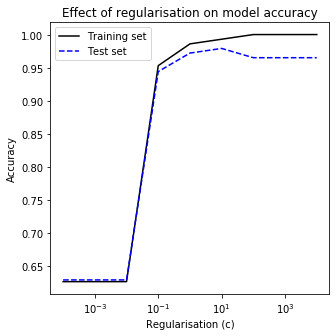

In [9]:
results = pd.DataFrame()
results['c'] = c_results
results['training_accuracy'] = training_accuracy
results['test_accuracy'] = test_accuracy
summary = results.groupby('c').median()
summary['c'] = list(summary.index)

print (summary)
chart_results (summary)